In [1]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 47.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 47.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_train = pd.read_csv('/content/drive/MyDrive/waterQuality/wQuality.csv')

In [5]:
data_train['corr'].value_counts()

1    19824
0    18981
Name: corr, dtype: int64

In [6]:
import pandas as pd
import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt

from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import losses

from tensorflow.keras.metrics import AUC

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, matthews_corrcoef, roc_curve, auc, roc_auc_score


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(data_train['text'],\
                                                      data_train['corr'],\
                                                      test_size=0.3,\
                                                      random_state=0)

In [8]:
# Building model with transformer
model_name = 'bert-base-cased'

trans = text.Transformer(model_name, maxlen=128)

In [9]:
X_train = X_train.values.astype(str).tolist()
y_train = y_train.values.astype(str).tolist()

X_test = X_test.values.astype(str).tolist()
y_test = y_test.values.astype(str).tolist()

In [10]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 21
	95percentile : 40
	99percentile : 44


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 20
	95percentile : 40
	99percentile : 43


In [11]:
# getting bert-base model.
model = trans.get_classifier()

In [12]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 6)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
# Training model
callbacks = [EarlyStopping(monitor='val_loss', patience=3)]

history = learner.fit_onecycle(lr = 1e-5, epochs = 10) #2e-5, 1e-4



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/10
4528/4528 [==============================] - 900s 194ms/step - loss: 0.2338 - accuracy: 0.9127 - val_loss: 0.1329 - val_accuracy: 0.9473
Epoch 2/10
4528/4528 [==============================] - 884s 194ms/step - loss: 0.1098 - accuracy: 0.9535 - val_loss: 0.1025 - val_accuracy: 0.9571
Epoch 3/10
4528/4528 [==============================] - 883s 194ms/step - loss: 0.0792 - accuracy: 0.9659 - val_loss: 0.1013 - val_accuracy: 0.9563
Epoch 4/10
4528/4528 [==============================] - 884s 194ms/step - loss: 0.0512 - accuracy: 0.9806 - val_loss: 0.1245 - val_accuracy: 0.9550
Epoch 5/10
4528/4528 [==============================] - 883s 194ms/step - loss: 0.0300 - accuracy: 0.9892 - val_loss: 0.1701 - val_accuracy: 0.9529
Epoch 6/10
4528/4528 [==============================] - 883s 194ms/step - loss: 0.0201 - accuracy: 0.9929 - val_loss: 0.1890 - val_accuracy: 0.9534
Epoch 7/10
4528/4528 [===========================

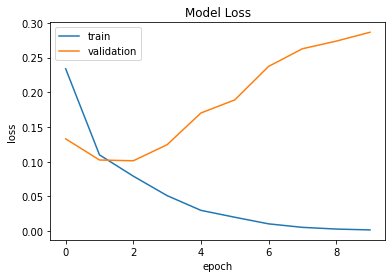

In [15]:
learner.plot('loss')

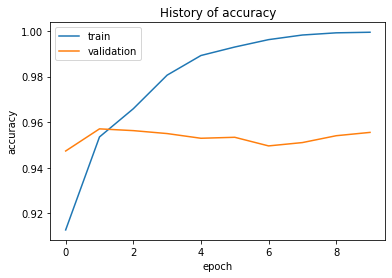

In [16]:
learner.plot('accuracy')


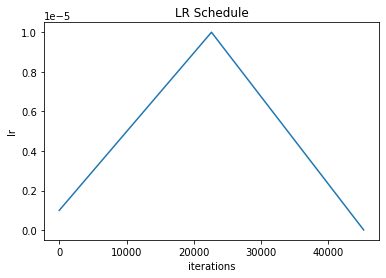

In [17]:
learner.plot('lr')

In [18]:
learner.validate()

364/364 [==============================] - 74s 196ms/step
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      5733
           1       0.96      0.95      0.96      5909

    accuracy                           0.96     11642
   macro avg       0.96      0.96      0.96     11642
weighted avg       0.96      0.96      0.96     11642



array([[5518,  215],
       [ 303, 5606]])